Confusion Matrix:
 [[64 16]
 [24 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        80
           1       0.71      0.62      0.66        63

    accuracy                           0.72       143
   macro avg       0.72      0.71      0.71       143
weighted avg       0.72      0.72      0.72       143


Accuracy Score: 0.7202797202797203


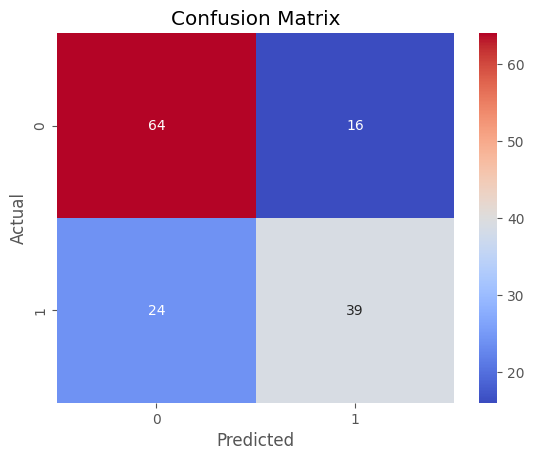

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set a valid style
plt.style.use('ggplot')  # safer style for Colab

# Load the Titanic dataset (Colab comes with seaborn datasets)
titanic = sns.load_dataset('titanic')

# Preprocessing
df = titanic.copy()
df.drop(['deck', 'embark_town', 'alive'], axis=1, inplace=True)
df.dropna(inplace=True)

# Encoding categorical features
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})
df['who'] = df['who'].map({'man': 0, 'woman': 1, 'child': 2})
df['adult_male'] = df['adult_male'].astype(int)
df['alone'] = df['alone'].astype(int)

# Selecting features and target
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'alone']]
y = df['survived']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Optional: Visualize prediction results
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<ipython-input-15-1b87972bf076>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Temp'].resample('M').mean()
<ipython-input-15-1b87972bf076>:47: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-1b87972bf076>:47: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


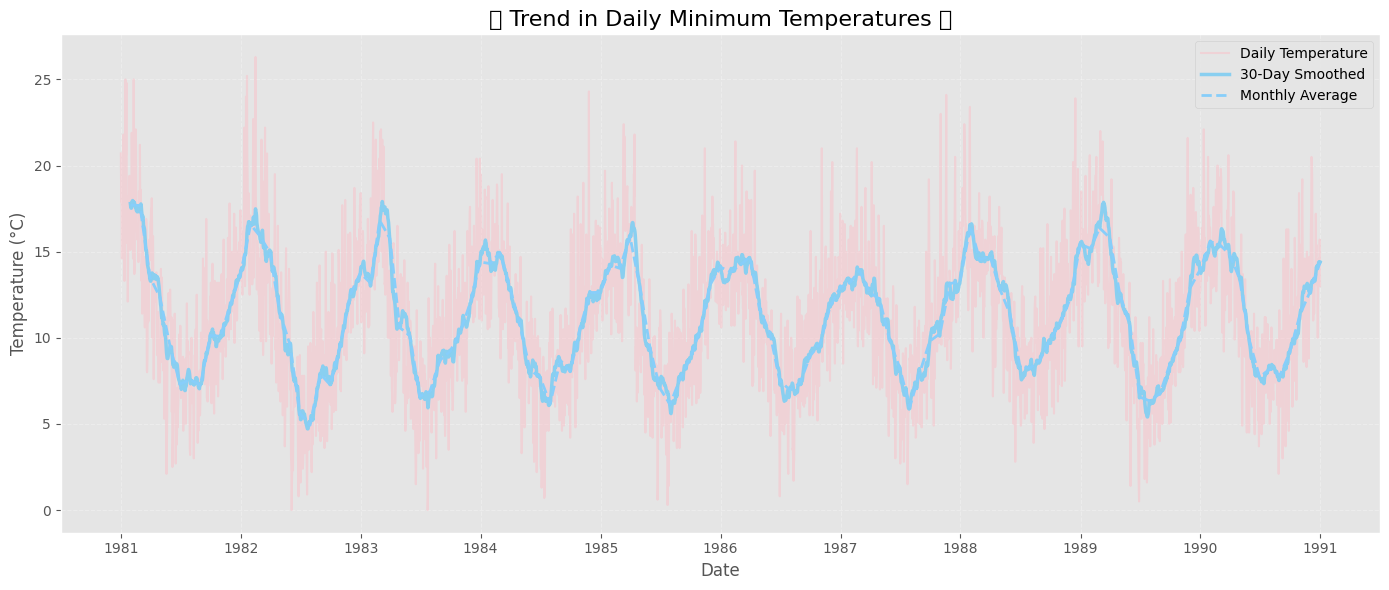

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV with correct column names
df = pd.read_csv("/content/daily-minimum-temperatures-in-me.csv")

# Rename columns for easier use
df.columns = ['Date', 'Temp']

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert Temp column to numeric (in case there are weird chars)
df['Temp'] = pd.to_numeric(df['Temp'], errors='coerce')

# Drop any rows with missing values
df.dropna(inplace=True)

# Set date as index for time series
df.set_index('Date', inplace=True)

# ---- 📉 Trend Analysis ----

# 1. Rolling average (30-day smoothing)
smoothed = df['Temp'].rolling(window=30).mean()

# 2. Monthly aggregation
monthly_avg = df['Temp'].resample('M').mean()

# ---- 🎨 Plotting the Pretty Graph ----
plt.figure(figsize=(14, 6))

# Plot daily temperature in baby pink
plt.plot(df.index, df['Temp'], color='#FFB6C1', alpha=0.4, label='Daily Temperature')

# Plot smoothed 30-day average in baby blue
plt.plot(smoothed.index, smoothed, color='#89CFF0', linewidth=2.5, label='30-Day Smoothed')

# Plot monthly average as dashed line
plt.plot(monthly_avg.index, monthly_avg, color='#87CEFA', linestyle='--', linewidth=2, label='Monthly Average')

plt.title("💗 Trend in Daily Minimum Temperatures 💙", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-20-06673b202759>:37: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


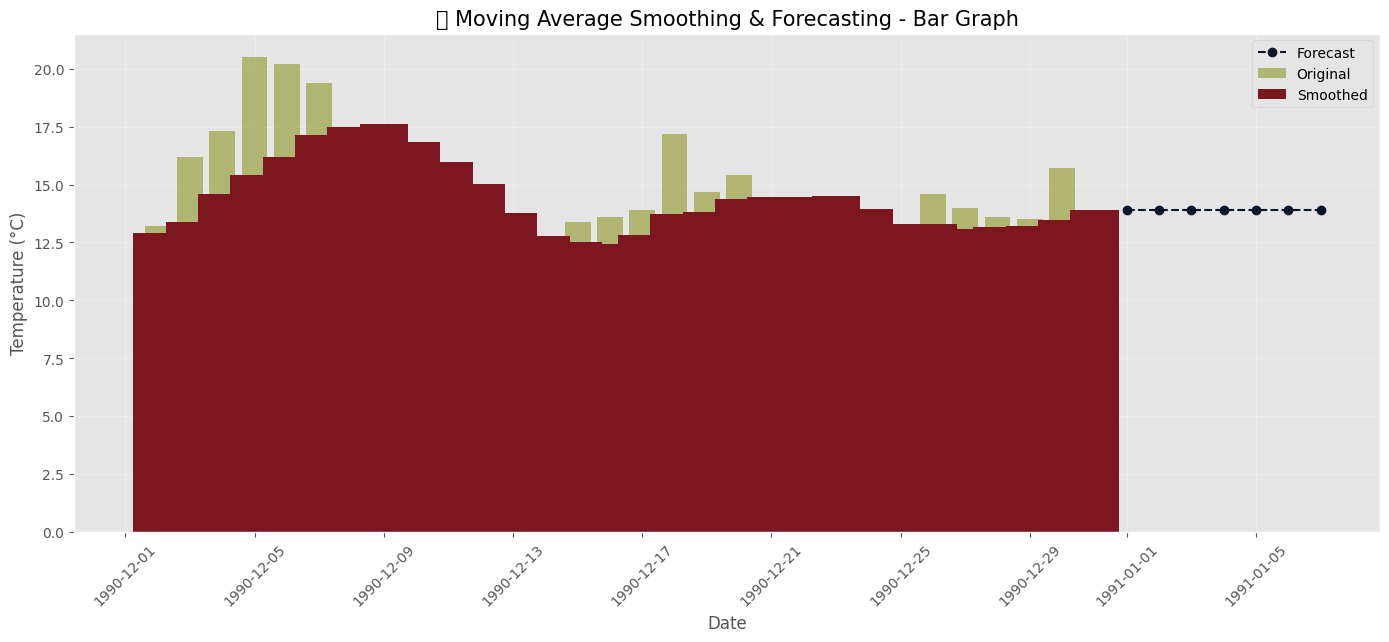

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("daily-minimum-temperatures-in-me.csv")

# Rename columns
df.columns = ['Date', 'Temp']

# Clean data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Temp'] = pd.to_numeric(df['Temp'], errors='coerce')
df.dropna(inplace=True)
df.set_index('Date', inplace=True)

# Apply 7-day moving average
df['Smoothed'] = df['Temp'].rolling(window=7).mean()

# Forecast for next 7 days using last smoothed value
forecast_days = 7
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days)
forecast_values = [df['Smoothed'].dropna().iloc[-1]] * forecast_days
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_index)

# Plot - Bar Graph Style 💖💙
plt.figure(figsize=(14, 6))
plt.bar(df.index[-30:], df['Temp'][-30:], label='Original', color='#7c8700', alpha=0.5)
plt.bar(df.index[-30:], df['Smoothed'][-30:], label='Smoothed', color='#7c1720', width=1.5)
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='#0a172b', linestyle='--', marker='o')

plt.title('💫 Moving Average Smoothing & Forecasting - Bar Graph', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
